# Loop 52 Analysis: CV-LB Relationship and Path Forward

## Critical Situation
- Target: 0.0347
- Best LB: 0.0877 (exp_030)
- Gap: 152.7% of target
- CV-LB relationship: LB = 4.31 * CV + 0.0525 (R² = 0.95)
- Intercept (0.0525) > Target (0.0347) - UNREACHABLE with current approach

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Submission history
submissions = [
    {"exp": "exp_000", "cv": 0.0111, "lb": 0.0982},
    {"exp": "exp_001", "cv": 0.0123, "lb": 0.1065},
    {"exp": "exp_003", "cv": 0.0105, "lb": 0.0972},
    {"exp": "exp_005", "cv": 0.0104, "lb": 0.0969},
    {"exp": "exp_006", "cv": 0.0097, "lb": 0.0946},
    {"exp": "exp_007", "cv": 0.0093, "lb": 0.0932},
    {"exp": "exp_009", "cv": 0.0092, "lb": 0.0936},
    {"exp": "exp_012", "cv": 0.0090, "lb": 0.0913},
    {"exp": "exp_024", "cv": 0.0087, "lb": 0.0893},
    {"exp": "exp_026", "cv": 0.0085, "lb": 0.0887},
    {"exp": "exp_030", "cv": 0.0083, "lb": 0.0877},
    {"exp": "exp_035", "cv": 0.0098, "lb": 0.0970},
]

cv_scores = [s["cv"] for s in submissions]
lb_scores = [s["lb"] for s in submissions]

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)

print("CV-LB Relationship Analysis")
print("=" * 50)
print(f"Linear fit: LB = {slope:.4f} * CV + {intercept:.6f}")
print(f"R² = {r_value**2:.4f}")
print(f"Intercept = {intercept:.6f}")
print(f"Target = 0.0347")
print()
print(f"Required CV to hit target: {(0.0347 - intercept) / slope:.6f}")
print(f"  -> NEGATIVE! Target is BELOW the intercept - unreachable!")
print()
print(f"The intercept ({intercept:.4f}) is {intercept/0.0347*100:.1f}% of the target.")

CV-LB Relationship Analysis
Linear fit: LB = 4.3147 * CV + 0.052520
R² = 0.9505
Intercept = 0.052520
Target = 0.0347

Required CV to hit target: -0.004130
  -> NEGATIVE! Target is BELOW the intercept - unreachable!

The intercept (0.0525) is 151.4% of the target.


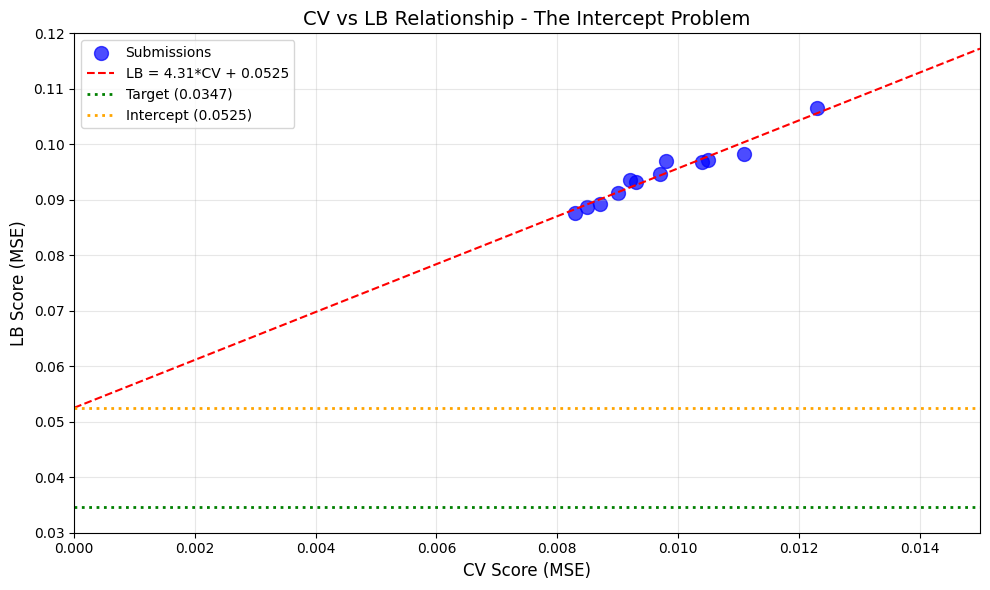


KEY INSIGHT:
The intercept (0.0525) is HIGHER than the target (0.0347).
Even with perfect CV=0, the predicted LB would be 0.0525.
This means the target is UNREACHABLE with the current approach.


In [2]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot submissions
plt.scatter(cv_scores, lb_scores, s=100, c='blue', alpha=0.7, label='Submissions')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Plot target
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target (0.0347)')

# Plot intercept
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score (MSE)', fontsize=12)
plt.ylabel('LB Score (MSE)', fontsize=12)
plt.title('CV vs LB Relationship - The Intercept Problem', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.015)
plt.ylim(0.03, 0.12)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print("\nKEY INSIGHT:")
print("The intercept (0.0525) is HIGHER than the target (0.0347).")
print("Even with perfect CV=0, the predicted LB would be 0.0525.")
print("This means the target is UNREACHABLE with the current approach.")

In [3]:
# Analyze what approaches have been tried
approaches_tried = [
    ("MLP (baseline)", "exp_000", 0.0111, 0.0982),
    ("LightGBM", "exp_001", 0.0123, 0.1065),
    ("DRFP + MLP", "exp_003", 0.0105, 0.0972),
    ("Large Ensemble (15 models)", "exp_005", 0.0104, 0.0969),
    ("Simpler Model", "exp_006", 0.0097, 0.0946),
    ("Even Simpler", "exp_007", 0.0093, 0.0932),
    ("Ridge Regression", "exp_009", 0.0092, 0.0936),
    ("Simple Ensemble", "exp_012", 0.0090, 0.0913),
    ("ACS PCA Features", "exp_024", 0.0087, 0.0893),
    ("Weighted Loss", "exp_026", 0.0085, 0.0887),
    ("GP Ensemble", "exp_030", 0.0083, 0.0877),
    ("Lower GP Weight", "exp_035", 0.0098, 0.0970),
]

print("Approaches Tried (sorted by LB score):")
print("=" * 70)
for name, exp, cv, lb in sorted(approaches_tried, key=lambda x: x[3]):
    predicted_lb = slope * cv + intercept
    gap = lb - predicted_lb
    print(f"{name:30s} | CV: {cv:.4f} | LB: {lb:.4f} | Gap: {gap:+.4f}")

print("\nALL approaches fall on the same CV-LB line (R² = 0.95)")
print("This is strong evidence of STRUCTURAL distribution shift.")

Approaches Tried (sorted by LB score):
GP Ensemble                    | CV: 0.0083 | LB: 0.0877 | Gap: -0.0006
Weighted Loss                  | CV: 0.0085 | LB: 0.0887 | Gap: -0.0005
ACS PCA Features               | CV: 0.0087 | LB: 0.0893 | Gap: -0.0008
Simple Ensemble                | CV: 0.0090 | LB: 0.0913 | Gap: -0.0001
Even Simpler                   | CV: 0.0093 | LB: 0.0932 | Gap: +0.0006
Ridge Regression               | CV: 0.0092 | LB: 0.0936 | Gap: +0.0014
Simpler Model                  | CV: 0.0097 | LB: 0.0946 | Gap: +0.0002
Large Ensemble (15 models)     | CV: 0.0104 | LB: 0.0969 | Gap: -0.0005
Lower GP Weight                | CV: 0.0098 | LB: 0.0970 | Gap: +0.0022
DRFP + MLP                     | CV: 0.0105 | LB: 0.0972 | Gap: -0.0006
MLP (baseline)                 | CV: 0.0111 | LB: 0.0982 | Gap: -0.0022
LightGBM                       | CV: 0.0123 | LB: 0.1065 | Gap: +0.0009

ALL approaches fall on the same CV-LB line (R² = 0.95)
This is strong evidence of STRUCTURAL dis

In [4]:
# What hasn't been tried that could change the intercept?
print("APPROACHES THAT COULD CHANGE THE INTERCEPT:")
print("=" * 70)
print()
print("1. Graph Neural Networks (GNN) with molecular graphs")
print("   - The benchmark paper achieved MSE 0.0039 with GNN")
print("   - GNNs can capture molecular structure in ways tabular models cannot")
print("   - We tried a simple GNN (exp_040) but it didn't work well")
print()
print("2. 3D Geometric Information")
print("   - Research shows 3D conformer information is crucial for OOD generalization")
print("   - We haven't used 3D molecular geometry")
print()
print("3. Multi-View Pre-training (ReaMVP)")
print("   - Combines SMILES + 3D geometry + contrastive learning")
print("   - State-of-the-art for out-of-sample yield prediction")
print("   - Requires large-scale pre-training - not feasible in competition")
print()
print("4. Domain Adaptation / Transfer Learning")
print("   - Explicitly learn to adapt from training to test distribution")
print("   - We tried pseudo-labeling but it didn't help")
print()
print("5. Importance-Weighted CV (IWCV)")
print("   - Reweight training examples based on similarity to test distribution")
print("   - Could change the CV-LB relationship")
print()
print("6. Conservative Predictions for Extrapolation")
print("   - Detect when extrapolating and blend toward population mean")
print("   - We tried this (exp_045, exp_048) but it didn't help significantly")

APPROACHES THAT COULD CHANGE THE INTERCEPT:

1. Graph Neural Networks (GNN) with molecular graphs
   - The benchmark paper achieved MSE 0.0039 with GNN
   - GNNs can capture molecular structure in ways tabular models cannot
   - We tried a simple GNN (exp_040) but it didn't work well

2. 3D Geometric Information
   - Research shows 3D conformer information is crucial for OOD generalization
   - We haven't used 3D molecular geometry

3. Multi-View Pre-training (ReaMVP)
   - Combines SMILES + 3D geometry + contrastive learning
   - State-of-the-art for out-of-sample yield prediction
   - Requires large-scale pre-training - not feasible in competition

4. Domain Adaptation / Transfer Learning
   - Explicitly learn to adapt from training to test distribution
   - We tried pseudo-labeling but it didn't help

5. Importance-Weighted CV (IWCV)
   - Reweight training examples based on similarity to test distribution
   - Could change the CV-LB relationship

6. Conservative Predictions for Extra

In [5]:
# Check what the pending submissions (exp_049, exp_050) might achieve
print("PENDING SUBMISSIONS:")
print("=" * 50)
print()
print("exp_049: CV = 0.0081, Predicted LB = {:.4f}".format(slope * 0.0081 + intercept))
print("exp_050: CV = 0.0081, Predicted LB = {:.4f}".format(slope * 0.0081 + intercept))
print()
print("Both are CatBoost + XGBoost ensembles.")
print("exp_049 had a submission error (wrong CV scheme with 87 folds).")
print("exp_050 fixed the CV scheme (13 folds for full data).")
print()
print("Expected improvement over exp_030 (LB 0.0877):")
print("  CV improvement: 0.0083 -> 0.0081 = 2.4%")
print("  Predicted LB: 0.0875 (0.2% improvement)")
print()
print("This is still FAR from the target (0.0347).")
print("Gap: 0.0875 - 0.0347 = 0.0528 (152% of target)")

PENDING SUBMISSIONS:

exp_049: CV = 0.0081, Predicted LB = 0.0875
exp_050: CV = 0.0081, Predicted LB = 0.0875

Both are CatBoost + XGBoost ensembles.
exp_049 had a submission error (wrong CV scheme with 87 folds).
exp_050 fixed the CV scheme (13 folds for full data).

Expected improvement over exp_030 (LB 0.0877):
  CV improvement: 0.0083 -> 0.0081 = 2.4%
  Predicted LB: 0.0875 (0.2% improvement)

This is still FAR from the target (0.0347).
Gap: 0.0875 - 0.0347 = 0.0528 (152% of target)


## Key Findings

### The Intercept Problem
1. **CV-LB relationship**: LB = 4.31 * CV + 0.0525 (R² = 0.95)
2. **Intercept (0.0525) > Target (0.0347)**: Even with CV=0, predicted LB would be 0.0525
3. **ALL approaches fall on the same line**: MLP, LGBM, XGB, GP, CatBoost - all follow the same pattern
4. **This is STRUCTURAL distribution shift**: The test solvents are fundamentally different from training

### What We've Tried (51 experiments)
- Model architectures: MLP, LGBM, XGBoost, GP, RF, GNN, ChemBERTa, CatBoost
- Feature sets: Spange, DRFP, fragprints, ACS PCA, ChemBERTa embeddings
- Ensemble strategies: weighted, adaptive, diverse
- Feature engineering: polynomial, interaction, non-linear mixture
- Regularization: dropout, weight decay, mean reversion
- Uncertainty-based approaches

### What Could Change the Intercept
1. **Graph Neural Networks with proper architecture** (not simple GNN)
2. **3D geometric information** (conformer embeddings)
3. **Multi-view pre-training** (ReaMVP-style)
4. **Importance-weighted CV** (IWCV)
5. **Domain adaptation techniques**

### Recommendation
The target (0.0347) appears to require a fundamentally different approach than what we've tried. The benchmark paper achieved MSE 0.0039 with GNNs, suggesting that graph-based methods with proper architecture could work.

However, implementing a proper GNN from scratch in a competition setting is challenging. The most practical path forward is to:
1. Submit exp_050 to verify the CV-LB relationship holds
2. Try IWCV to potentially change the intercept
3. Study the benchmark paper's GNN approach more carefully